In [4]:
import fastf1
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

In [5]:
fastf1.Cache.enable_cache('cache/')

# First test qualifying times

In [6]:
bah21 = fastf1.get_session(2021, 'Bahrain', 'Q')
bah21.load(telemetry=True, laps=True, weather=True)
bah22 = fastf1.get_session(2022, 'Bahrain', 'Q')
bah22.load(telemetry=True, laps=True, weather=True)
bah23 = fastf1.get_session(2023, 'Bahrain', 'Q')
bah23.load(telemetry=True, laps=True, weather=True)


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/pav/Coding/python/Small_projects/f1_analysis/venv/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/pav/Coding/python/Small_projects/f1_analysis/venv/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/pav/Coding/python/Small_projects/f1_analysis/venv/lib/python3.10/site-packages/fastf1/cor

In [7]:
q21 = pd.DataFrame(bah21.laps)
q22 = pd.DataFrame(bah22.laps)
q23 = pd.DataFrame(bah23.laps)
q23.head()

Index(['Time', 'DriverNumber', 'LapTime', 'LapNumber', 'PitOutTime',
       'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Stint', 'LapStartTime', 'Team',
       'Driver', 'TrackStatus', 'IsAccurate', 'LapStartDate'],
      dtype='object')


,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:27:20.459000,1,NaT,1,0 days 00:18:59.843000,0 days 00:21:06.934000,NaT,NaT,NaT,NaT,...,SOFT,1.0,True,1,0 days 00:18:59.843000,Red Bull Racing,VER,5,False,2023-03-04 15:04:00.840
1,0 days 00:29:32.394000,1,NaT,2,0 days 00:27:20.459000,NaT,NaT,0 days 00:00:53.666000,0 days 00:00:38.509000,NaT,...,SOFT,2.0,False,2,0 days 00:27:20.459000,Red Bull Racing,VER,1,False,2023-03-04 15:12:21.456
2,0 days 00:31:03.689000,1,0 days 00:01:31.295000,3,NaT,NaT,0 days 00:00:29.152000,0 days 00:00:39.195000,0 days 00:00:22.948000,0 days 00:30:01.546000,...,SOFT,3.0,False,2,0 days 00:29:32.394000,Red Bull Racing,VER,1,True,2023-03-04 15:14:33.391
3,0 days 00:32:53.501000,1,0 days 00:01:49.812000,4,NaT,0 days 00:32:51.749000,0 days 00:00:35.615000,0 days 00:00:44.953000,0 days 00:00:29.244000,0 days 00:31:39.304000,...,SOFT,4.0,False,2,0 days 00:31:03.689000,Red Bull Racing,VER,1,False,2023-03-04 15:16:04.686
4,0 days 00:40:05.688000,1,NaT,5,0 days 00:37:48.525000,NaT,NaT,0 days 00:00:53.390000,0 days 00:00:45.107000,NaT,...,SOFT,1.0,True,3,0 days 00:32:53.501000,Red Bull Racing,VER,1,False,2023-03-04 15:17:54.498


In [8]:
best23 = q23.loc[q23['IsPersonalBest'] == True, :].dropna(subset=['LapTime']).sort_values(['DriverNumber', 'LapTime'], ascending=True)
best22 = q22.loc[q22['IsPersonalBest'] == True, :].dropna(subset=['LapTime']).sort_values(['DriverNumber', 'LapTime'], ascending=True)
best21 = q21.loc[q21['IsPersonalBest'] == True, :].dropna(subset=['LapTime']).sort_values(['DriverNumber', 'LapTime'], ascending=True)

# also convert sector times and lap times to timestamps
for d in [best23, best22, best21]:
    d['LapTime'] = d.LapTime.values.astype(np.int64) / 10**9
    d['Sector1Time'] = d.Sector1Time.values.astype(np.int64) / 10**9
    d['Sector2Time'] = d.Sector2Time.values.astype(np.int64) / 10**9
    d['Sector3Time'] = d.Sector3Time.values.astype(np.int64) / 10**9

In [9]:
# check out which drivers are in 2022 and 2023 and racing 
# for the same team to take driver skill out of the equation
r = pd.merge(best23.loc[:, ['DriverNumber', 'Team']], 
             best22.loc[:, ['DriverNumber', 'Team']], 
             how='inner', 
             on=['DriverNumber', 'Team'])
remaining_drivers = r.DriverNumber.values
print(remaining_drivers)

['1' '11' '16' '18' '20' '22' '23' '24' '31' '4' '44' '55' '63' '77']


In [152]:
def calculate_differences_between_years(driver_number: str):
    t23 = best23.loc[best23['DriverNumber'] == driver_number]
    t22 = best22.loc[best22['DriverNumber'] == driver_number]
    
    diff22: list[float] = []
    colors22: list[str] = []
    
    for c in ['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime']:
        diff = (1 - (t23.loc[:, c].values[0] / t22.loc[:, c].values[0])) * 100
        col = 'seagreen' if diff > 0 else 'orangered'
        diff22.append(diff)
        colors22.append(col)
    
    diff21: list[float] | None = []
    colors21: list[str] | None = []  
    try:
        t21 = pd.merge(best21, best23.loc[:, ['DriverNumber', 'Team']], how='inner', on=['DriverNumber', 'Team'])
        t21 = t21.loc[t21['DriverNumber'] == driver_number]
        
    except KeyError:
        diff21 = None
        colors21 = None
    else:
        if t21.shape[0]:
            for c in ['Sector1Time', 'Sector2Time', 'Sector3Time', 'LapTime']:
                diff = (1 - (t23.loc[:, c].values[0] / t21.loc[:, c].values[0])) * 100
                col = 'seagreen' if diff > 0 else 'orangered'
                diff21.append(diff)
                colors21.append(col)
    
    return diff22, colors22, diff21, colors21    
    

In [11]:
def plot_yoy_performance_differences(driver_number: str):    
    diff_vs_22, colors_22, diff_vs_21, colors_21 = calculate_differences_between_years(driver_number)
    
    if diff_vs_21:
        _, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
        
        # plot differences compared to 2022 car
        sns.barplot(x=diff_vs_22, y=['Sector 1', 'Sector 2', 'Sector 3', 'Lap time'], palette=colors_22, width=0.6, ax=axs[0])
        axs[0].spines['top'].set_visible(False)
        axs[0].spines['right'].set_visible(False)
        axs[0].spines['left'].set_visible(False)        
        axs[0].spines['bottom'].set_visible(False)        
        axs[0].set_xlabel('Percentage time difference')
        axs[0].set_ylabel('', )
        axs[0].set_title('Percentage improvement of 2023 car time vs 2022 car', pad=30)
        axs[0].tick_params(
            axis='y',
            which='both',
            left=False        
            )
        
        # plot differences compared to 2021 car if the driver was in 2021 championship
        sns.barplot(x=diff_vs_21, y=['Sector 1', 'Sector 2', 'Sector 3', 'Lap time'], palette=colors_21, width=0.6, ax=axs[1])
        axs[1].spines['top'].set_visible(False)
        axs[1].spines['right'].set_visible(False)
        axs[1].spines['left'].set_visible(False)
        axs[1].spines['bottom'].set_visible(False)
        axs[1].set_xlabel('Percentage time difference')
        axs[1].set_title('Percentage improvement of 2023 car time vs 2021 car', pad=30)
        axs[1].tick_params(
            axis='y',
            which='both',
            left=False        
            )
        
    else:
        _, ax = plt.subplots(figsize=(15, 8))
        
        sns.barplot(x=diff_vs_22, y=['Sector 1', 'Sector 2', 'Sector 3', 'Lap time'], palette=colors_22, width=0.6, ax=ax)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.set_xlabel('Percentage time difference')
        ax.set_title('Percentage improvement of 2023 car time vs 2022 car', pad=30)
        ax.tick_params(
            axis='y',
            which='both',
            left=False        
            )
    plt.show()

# Go through drivers checking how they did in reverse order of constructor's championship

## Williams F1 Team
The only driver remaining from 2022 is Alex Albon.

[1.062102557164124, 1.686843622327494, 0.9309141059345771, 1.2982387982388044]


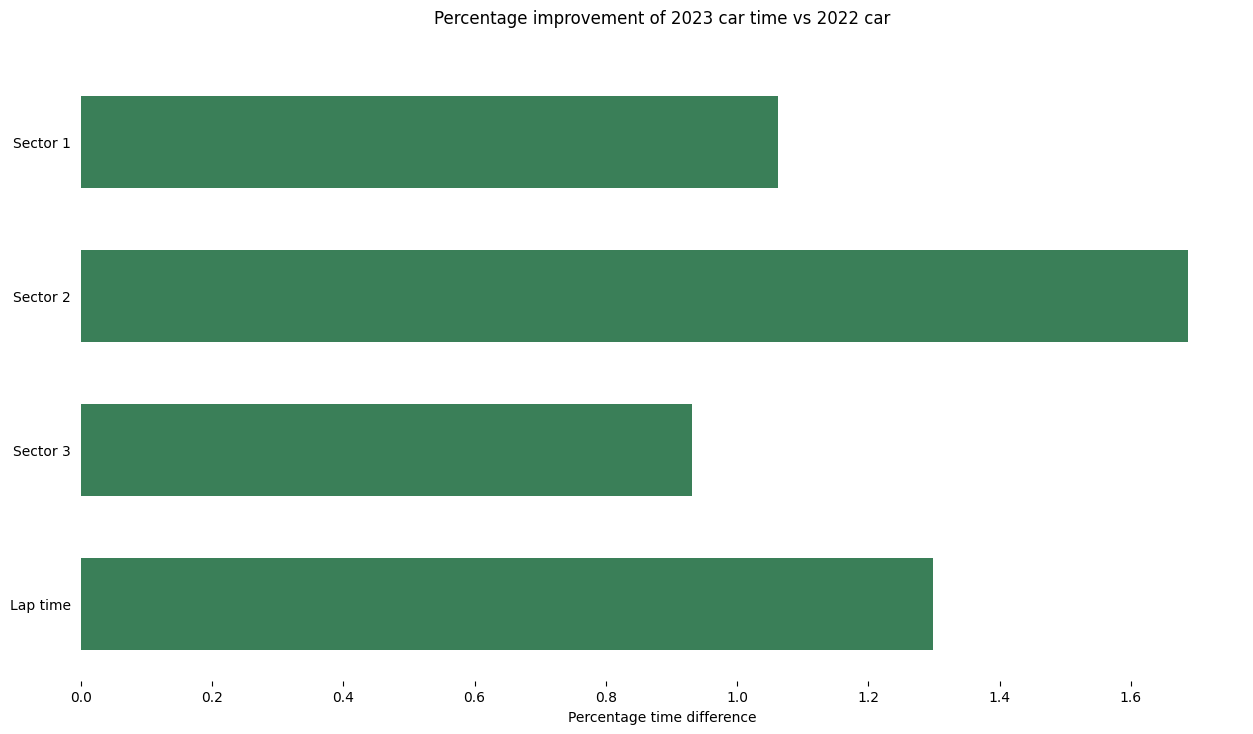

In [153]:
# alex albon
plot_yoy_performance_differences(driver_number='23')

## Alpha Tauri F1 Team
Here both Yuki Tsunoda remains in the same team for 2023, 2022 and 2021

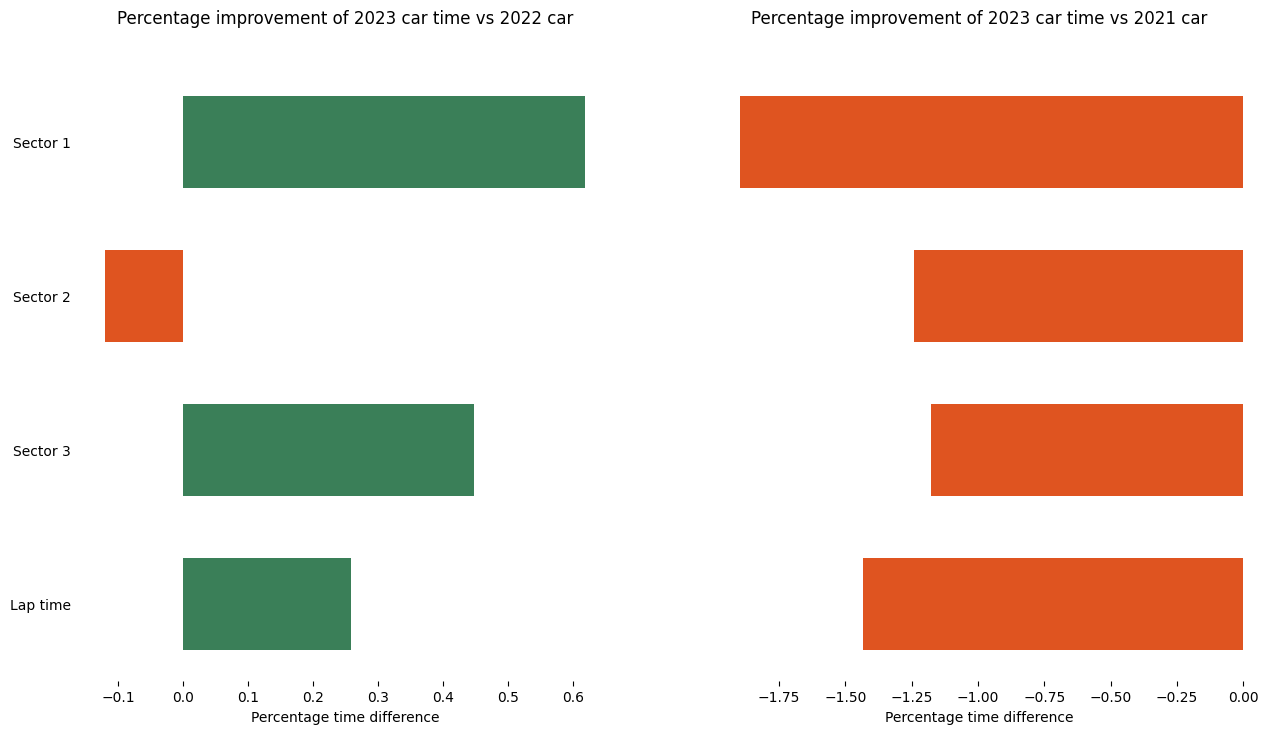

In [13]:
plot_yoy_performance_differences(driver_number='22')

## Haas F1 Team
Here Kevin Magnussen is the only remaining driver from 2022.

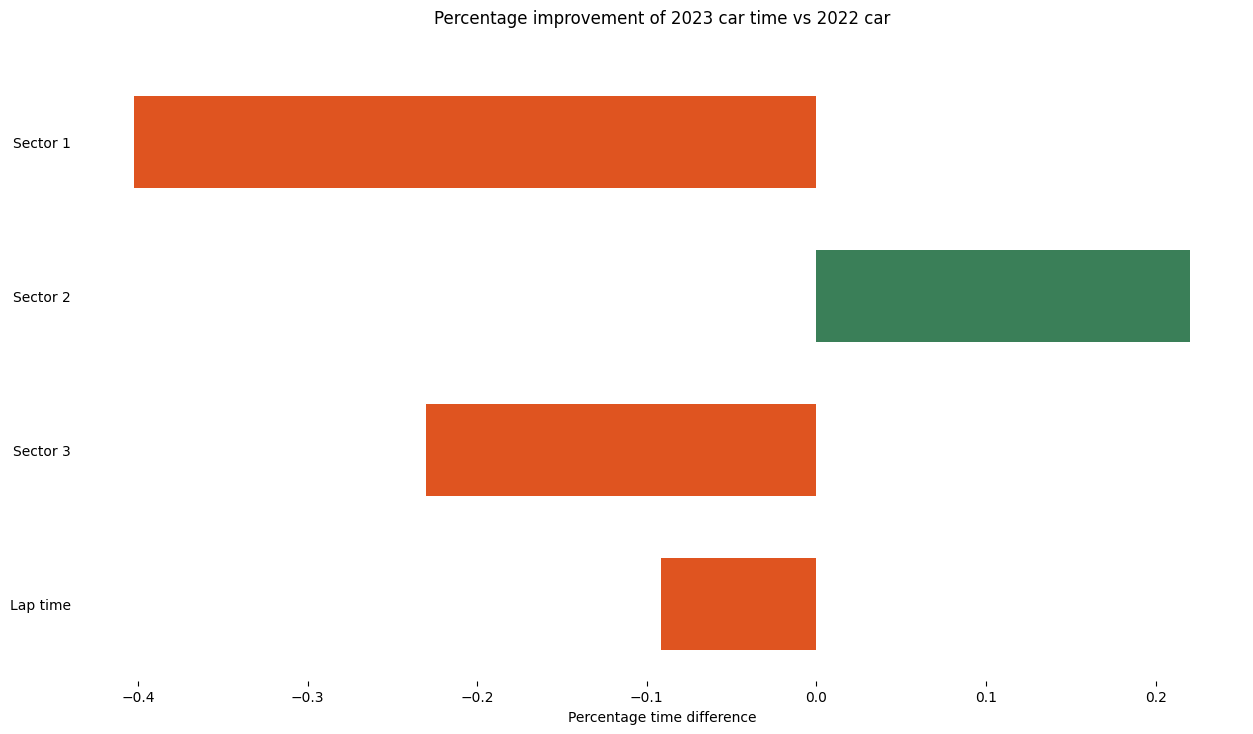

In [14]:
plot_yoy_performance_differences(driver_number='20')

## Aston Martin F1 Team
Lance Stroll

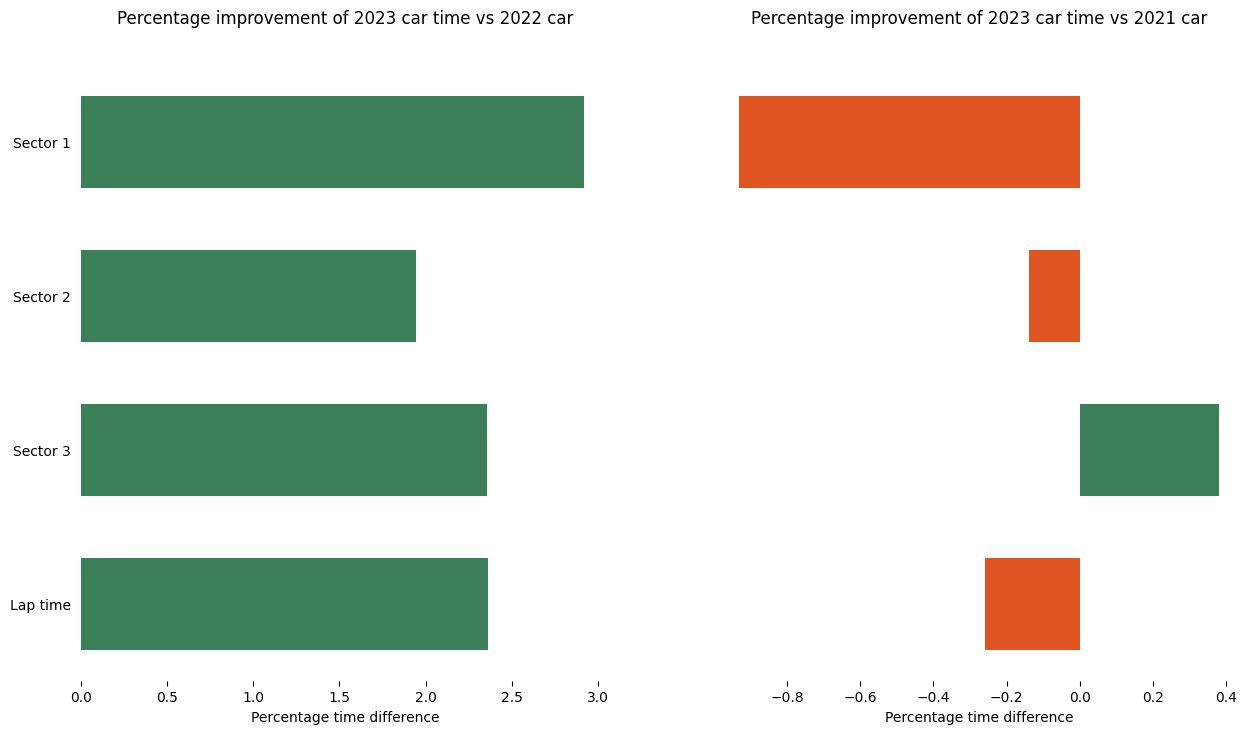

In [15]:
plot_yoy_performance_differences('18')

## Alfa Romeo F1 Team
Both Valtteri Bottas and Guanyu Zhou remain

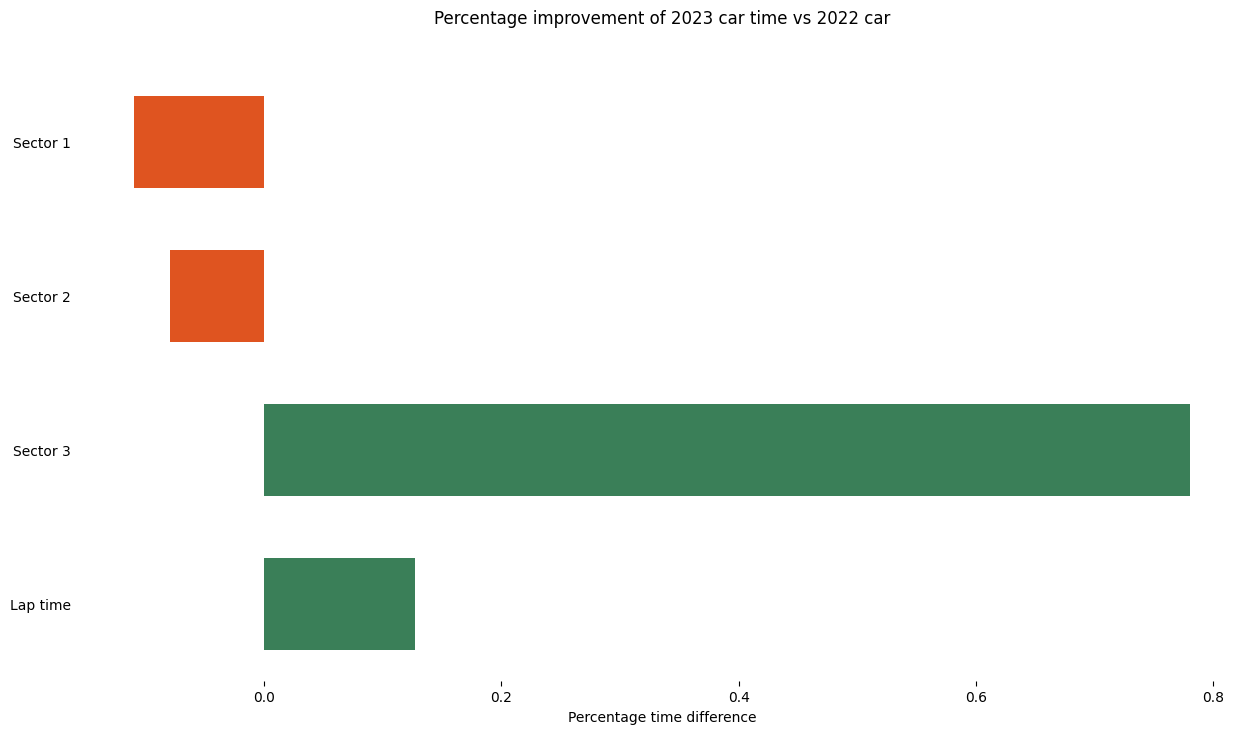

In [16]:
# Valtteri Bottas
plot_yoy_performance_differences('77')

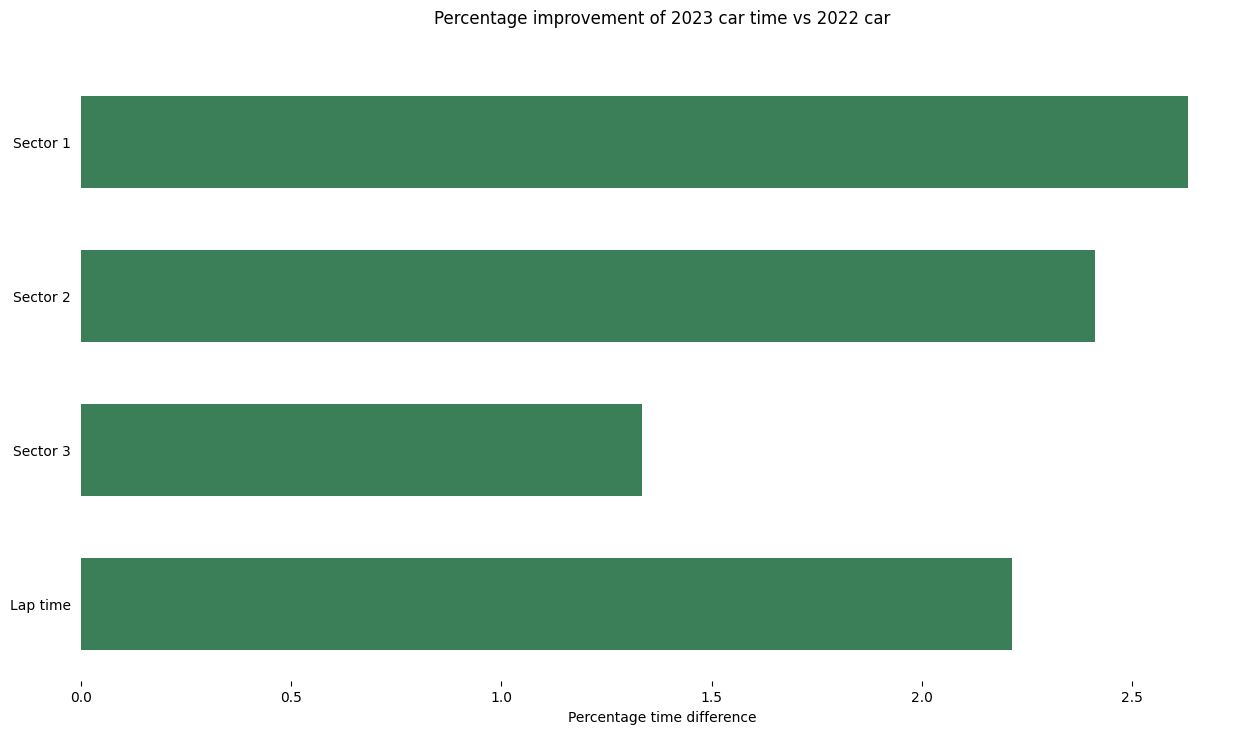

In [17]:
# Guanyu Zhou
plot_yoy_performance_differences('24')

## McLaren F1 Team
Lando Norris remains for 2021, 2022 and 2023

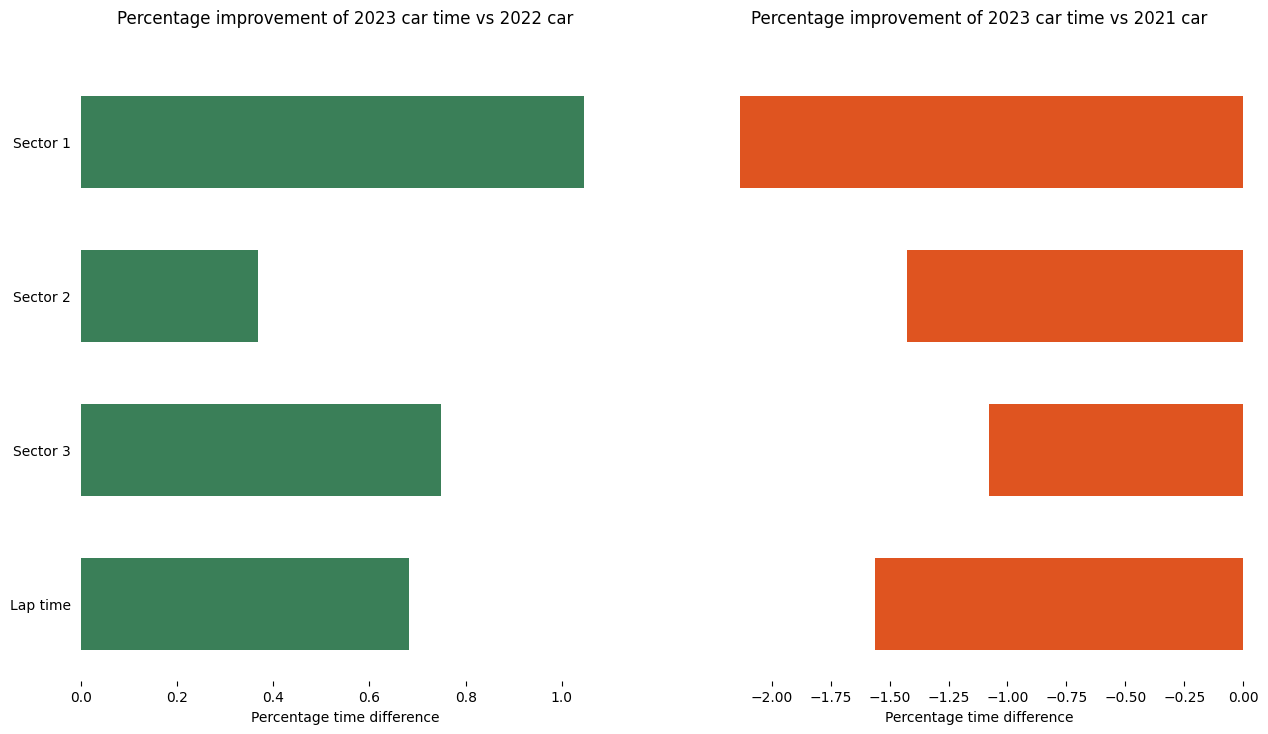

In [18]:
plot_yoy_performance_differences('4')

## Alpine F1 Team
Here Esteban Occon is the only remaining driver.

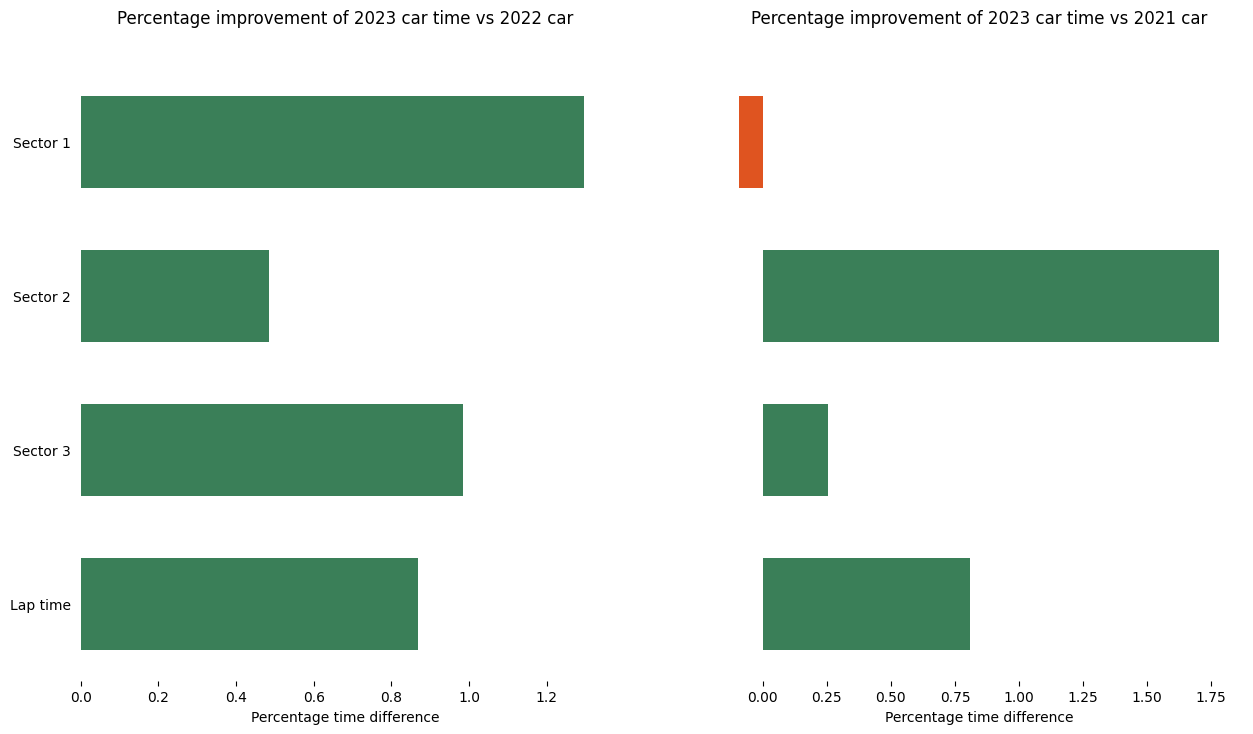

In [19]:
plot_yoy_performance_differences('31')

## Mercedes F1 Team
Both Lewis Hamilton and George Russel remain for 2022 and 2023.

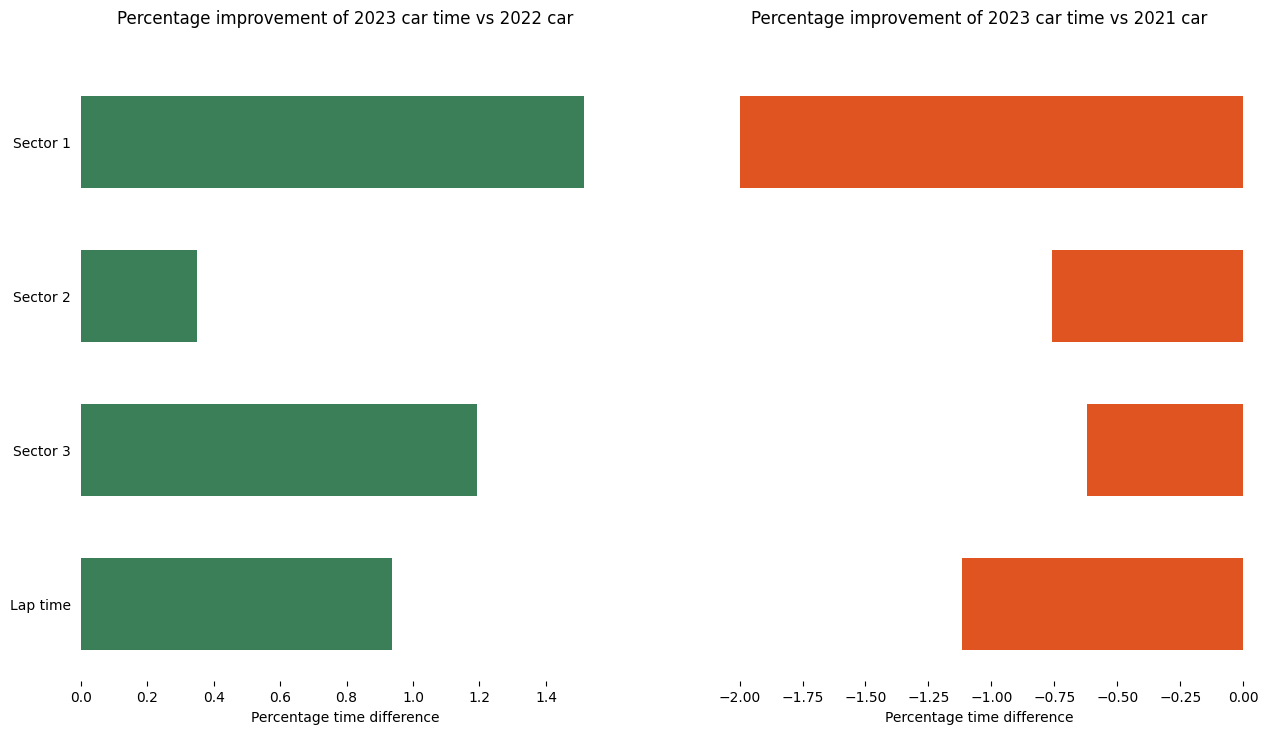

In [20]:
# Lewis Hamilton
plot_yoy_performance_differences('44')

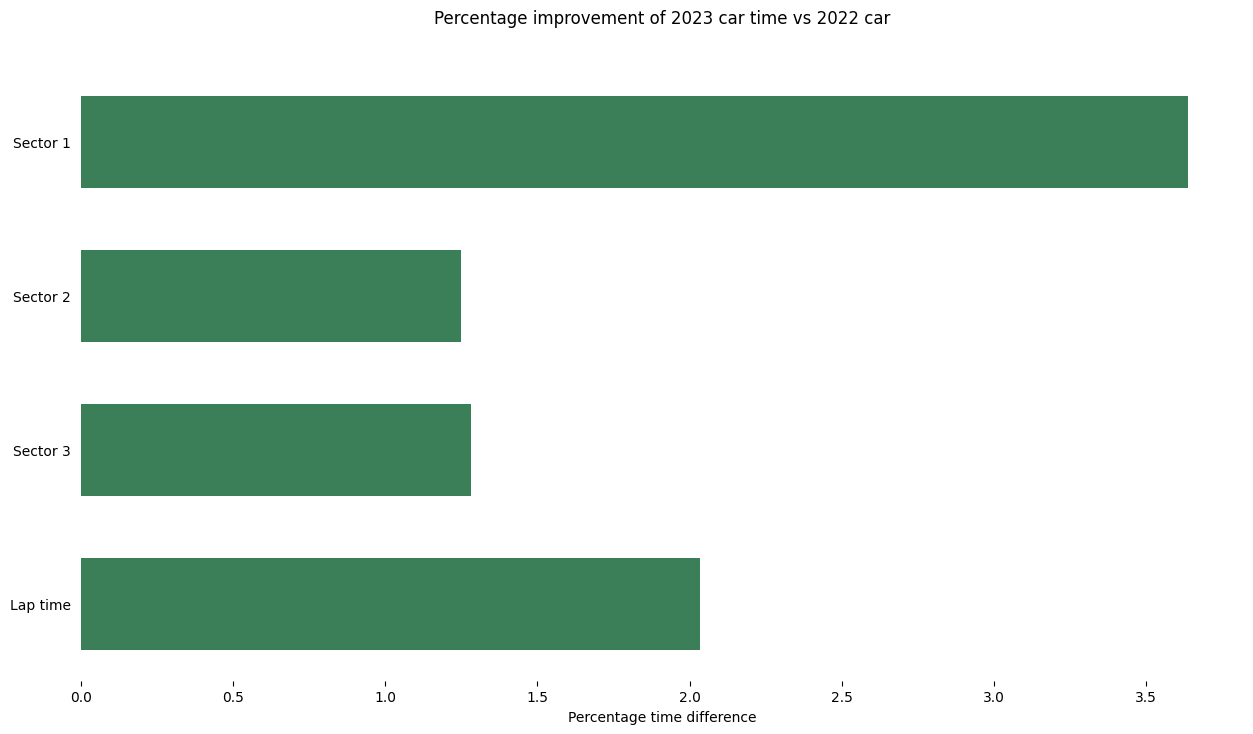

In [21]:
# George Russell
plot_yoy_performance_differences('63')

## Ferrari F1 Team
Both Carlos Sainz Jr and Charles Leclerc stayed for 2021, 2022 and 2023

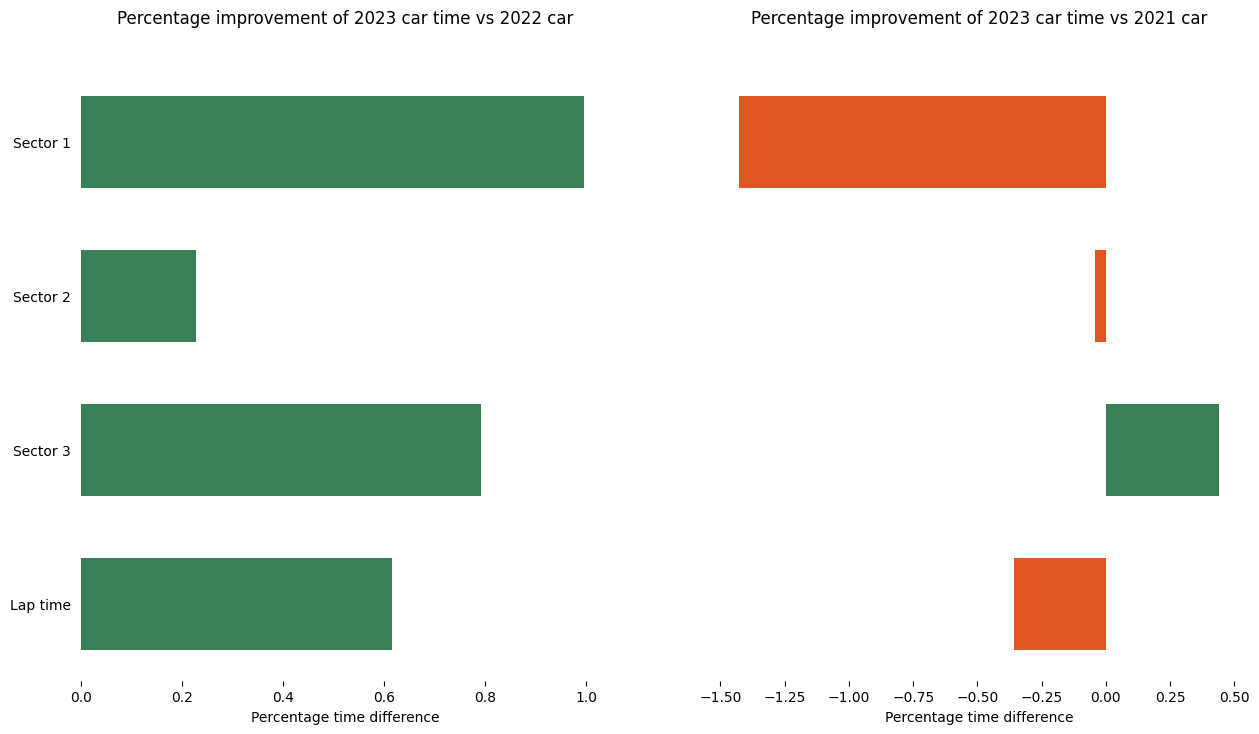

In [22]:
# Charles Leclerc
plot_yoy_performance_differences('16')

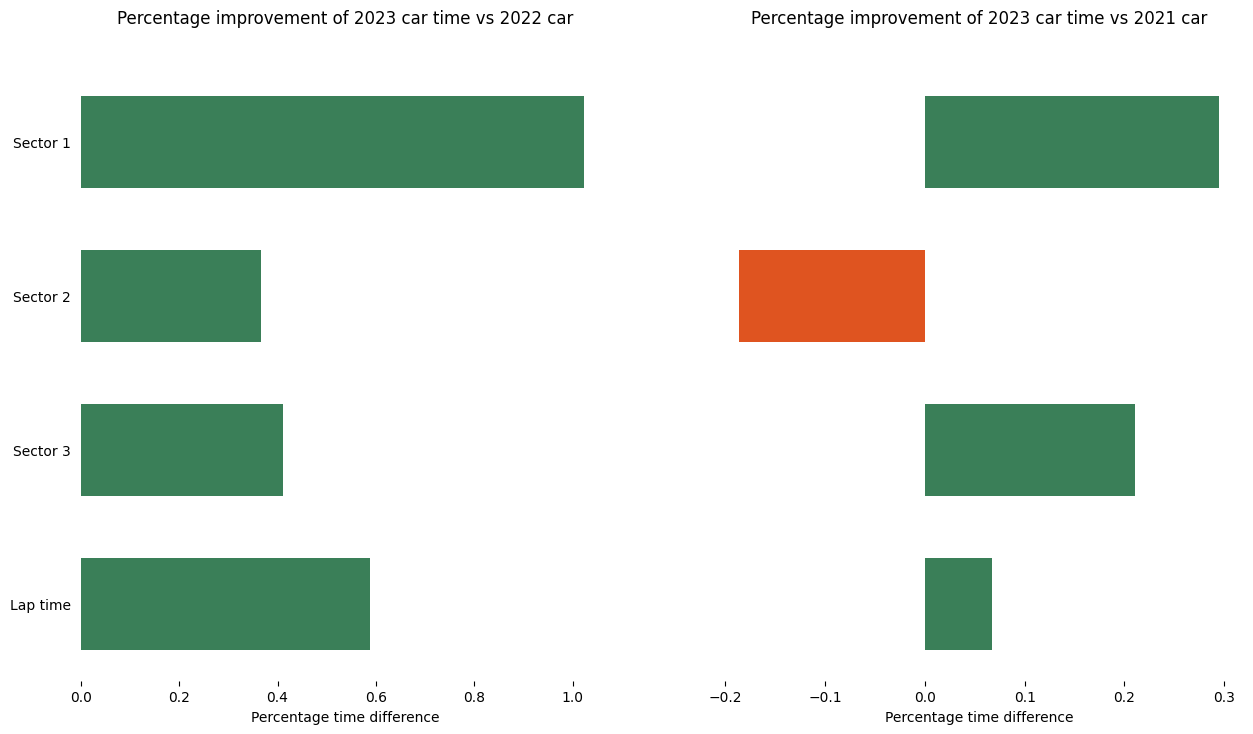

In [23]:
# Carlos Sainz
plot_yoy_performance_differences('55')

## Red Bull F1 team
Both Max Verstappen and Sergio Perez remain for 2022 and 2023. Max changed car number between 2021 and 2022 so no comparison with 2021.

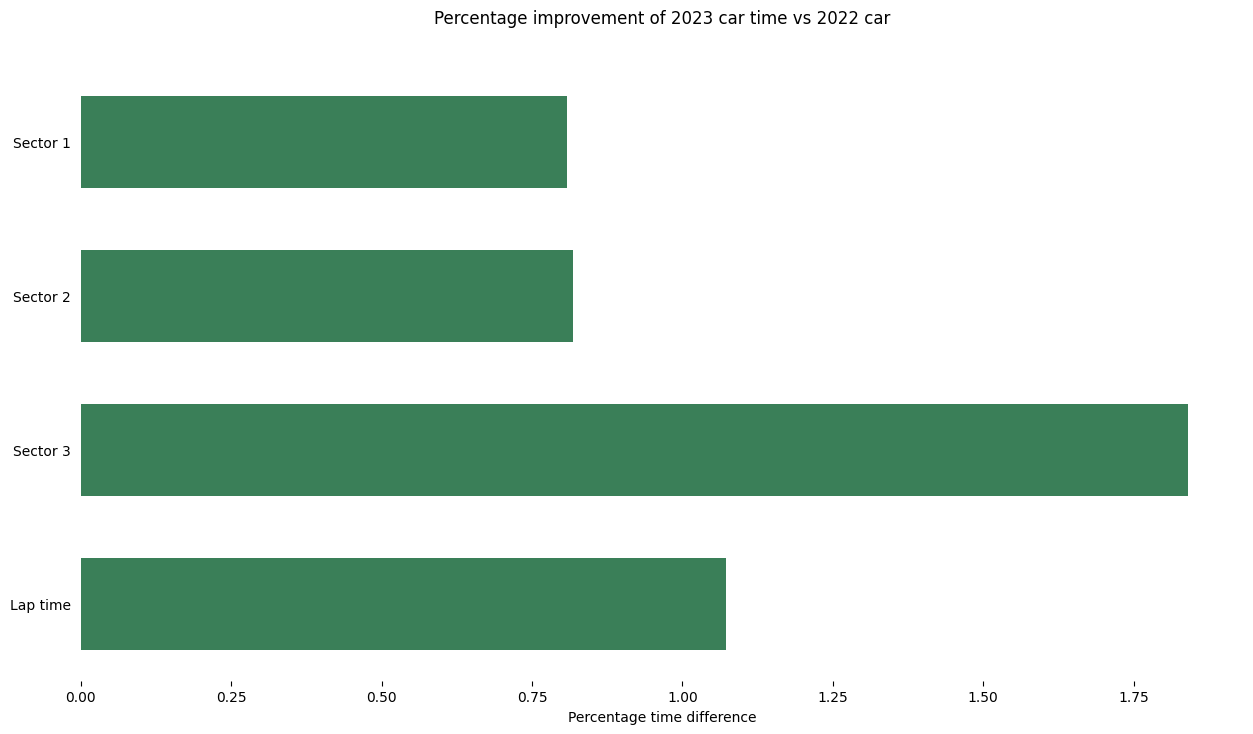

In [24]:
plot_yoy_performance_differences('1')

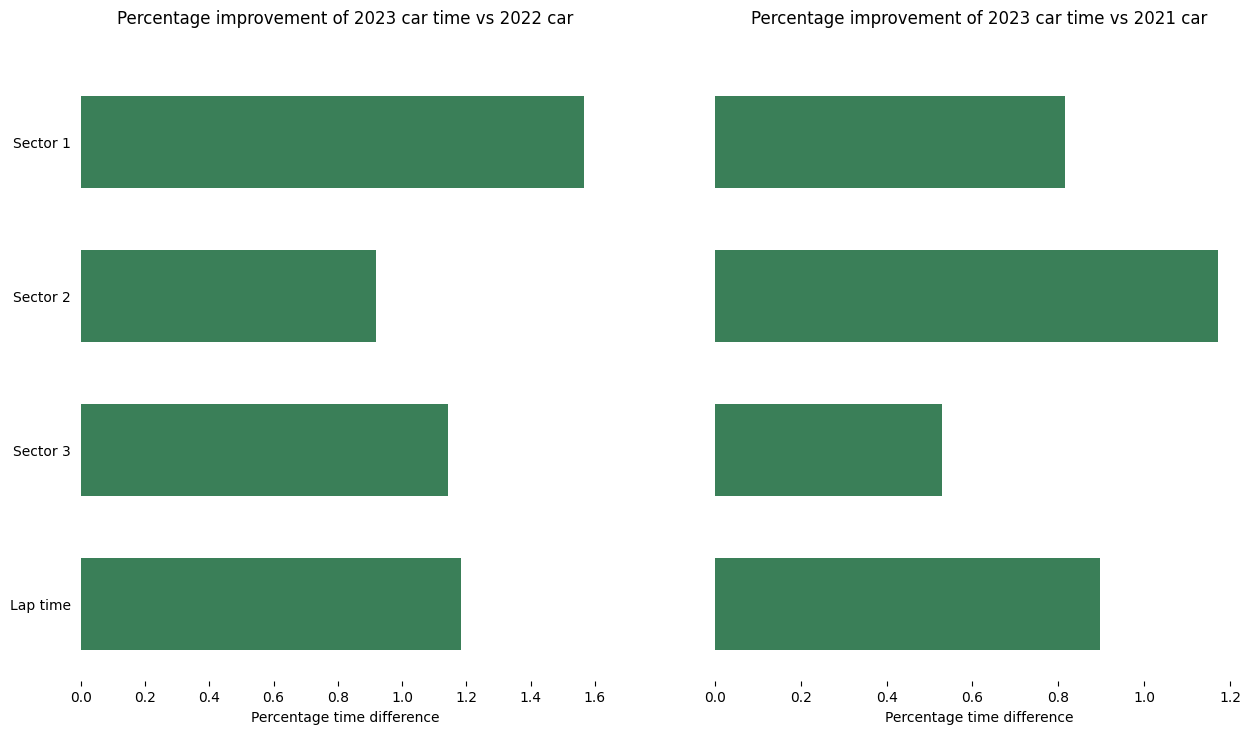

In [25]:
plot_yoy_performance_differences('11')

# Race pace

In [26]:
bah23_r = fastf1.get_session(2023, 'Bahrain', 'R')
bah23_r.load(telemetry=True, laps=True, weather=True)
bah22_r = fastf1.get_session(2022, 'Bahrain', 'R')
bah22_r.load(telemetry=True, laps=True, weather=True)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.3.1]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
/home/pav/Coding/python/Small_projects/f1_analysis/venv/lib/python3.10/site-packages/fastf1/core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
/home/pav/Coding/python/Small_projects/f1_analysis/venv/lib/python3.10/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/home/pav/Coding/pytho

In [27]:
r23 = pd.DataFrame(bah23_r.laps)
r22 = pd.DataFrame(bah22_r.laps)

r23.dropna(subset=['LapTime'], inplace=True)
r22.dropna(subset=['LapTime'], inplace=True)
r23['LapTime'] = r23.LapTime.values.astype(np.int64) / 10**9
r22['LapTime'] = r22.LapTime.values.astype(np.int64) / 10**9
r23

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
1,0 days 01:05:53.935000,1,97.974,2,NaT,NaT,0 days 00:00:31.342000,0 days 00:00:42.504000,0 days 00:00:24.128000,0 days 01:04:47.303000,...,SOFT,5.0,False,1,0 days 01:04:15.961000,Red Bull Racing,VER,2,True,2023-03-05 15:05:17.810
2,0 days 01:07:31.941000,1,98.006,3,NaT,NaT,0 days 00:00:31.388000,0 days 00:00:42.469000,0 days 00:00:24.149000,0 days 01:06:25.323000,...,SOFT,6.0,False,1,0 days 01:05:53.935000,Red Bull Racing,VER,1,True,2023-03-05 15:06:55.784
3,0 days 01:09:09.917000,1,97.976,4,NaT,NaT,0 days 00:00:31.271000,0 days 00:00:42.642000,0 days 00:00:24.063000,0 days 01:08:03.212000,...,SOFT,7.0,False,1,0 days 01:07:31.941000,Red Bull Racing,VER,1,True,2023-03-05 15:08:33.790
4,0 days 01:10:47.952000,1,98.035,5,NaT,NaT,0 days 00:00:31.244000,0 days 00:00:42.724000,0 days 00:00:24.067000,0 days 01:09:41.161000,...,SOFT,8.0,False,1,0 days 01:09:09.917000,Red Bull Racing,VER,1,True,2023-03-05 15:10:11.766
5,0 days 01:12:25.938000,1,97.986,6,NaT,NaT,0 days 00:00:31.341000,0 days 00:00:42.632000,0 days 00:00:24.013000,0 days 01:11:19.293000,...,SOFT,9.0,False,1,0 days 01:10:47.952000,Red Bull Racing,VER,1,True,2023-03-05 15:11:49.801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,0 days 01:17:53.342000,81,101.534,9,NaT,NaT,0 days 00:00:31.989000,0 days 00:00:44.548000,0 days 00:00:24.997000,0 days 01:16:43.797000,...,SOFT,9.0,True,1,0 days 01:16:11.808000,McLaren,PIA,1,True,2023-03-05 15:17:13.657
1051,0 days 01:19:34.926000,81,101.584,10,NaT,NaT,0 days 00:00:31.779000,0 days 00:00:44.617000,0 days 00:00:25.188000,0 days 01:18:25.121000,...,SOFT,10.0,True,1,0 days 01:17:53.342000,McLaren,PIA,1,True,2023-03-05 15:18:55.191
1052,0 days 01:21:16.278000,81,101.352,11,NaT,NaT,0 days 00:00:31.894000,0 days 00:00:44.557000,0 days 00:00:24.901000,0 days 01:20:06.820000,...,SOFT,11.0,True,1,0 days 01:19:34.926000,McLaren,PIA,1,True,2023-03-05 15:20:36.775
1053,0 days 01:22:57.434000,81,101.156,12,NaT,NaT,0 days 00:00:32.100000,0 days 00:00:44.235000,0 days 00:00:24.821000,0 days 01:21:48.378000,...,SOFT,12.0,True,1,0 days 01:21:16.278000,McLaren,PIA,1,True,2023-03-05 15:22:18.127


In [28]:
av23 = r23.loc[:, ['LapTime', 'Team']].groupby('Team').mean().sort_values('LapTime')
av22 = r22.loc[:, ['LapTime', 'Team']].groupby('Team').mean().sort_values('LapTime')

combined_av = pd.merge(av23, av22, on='Team', suffixes=['_2023', '_2022'])
combined_av['Percentage improvement'] = (1 - combined_av.LapTime_2023 / combined_av.LapTime_2022) * 100
combined_av.sort_values('Percentage improvement', ascending=False, inplace=True)

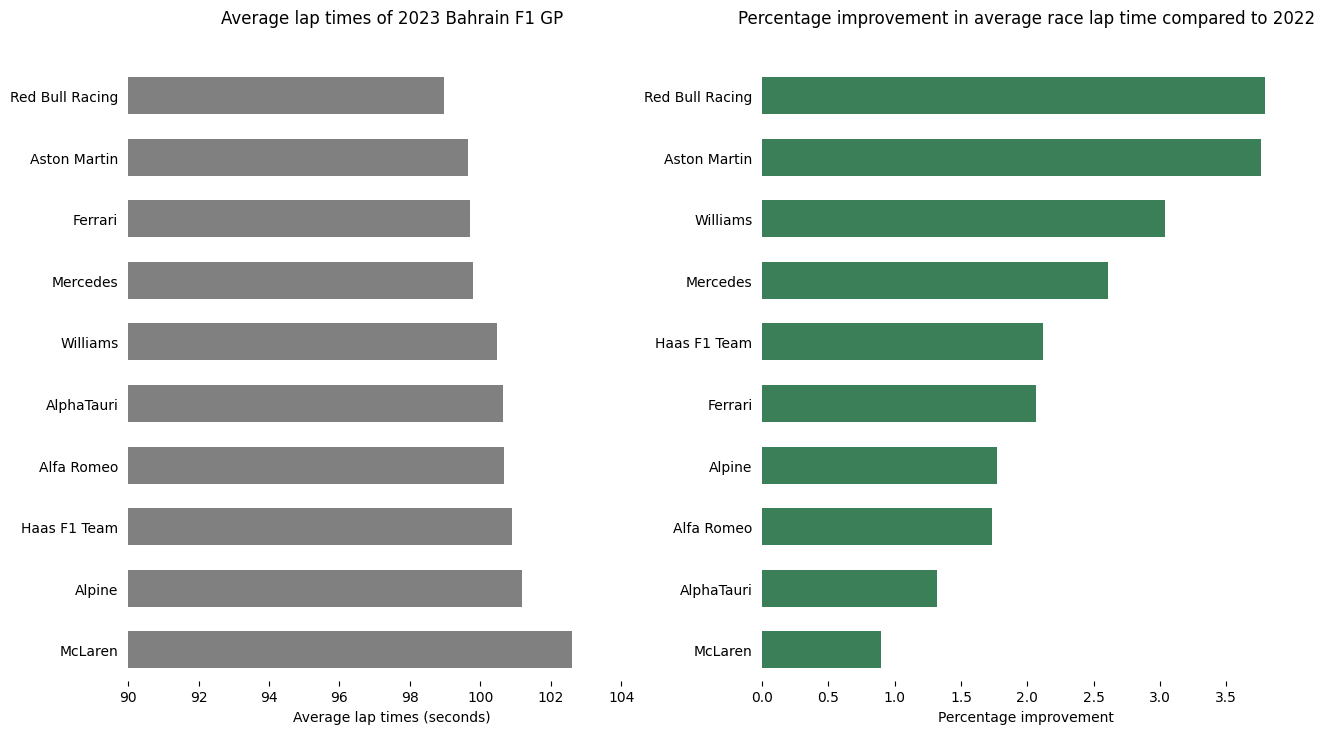

In [292]:
_, axs = plt.subplots(1, 2, figsize=(15, 8))

# plot the average times by team
sns.barplot(x=av23['LapTime'], y=av23.index, color='grey', width=0.6, ax=axs[0])
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)        
axs[0].spines['bottom'].set_visible(False) 
axs[0].set_xlim(90, 105)       
axs[0].set_xlabel('Average lap times (seconds)')
axs[0].set_ylabel('', )
axs[0].set_title('Average lap times of 2023 Bahrain F1 GP', pad=30)
axs[0].tick_params(
    axis='y',
    which='both',
    left=False        
    )

sns.barplot(x=combined_av['Percentage improvement'], y=combined_av.index, color='seagreen', width=0.6, ax=axs[1])
axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)        
axs[1].spines['bottom'].set_visible(False)      
axs[1].set_xlabel('Percentage improvement')
axs[1].set_ylabel('')
axs[1].set_title('Percentage improvement in average race lap time compared to 2022', pad=30)
axs[1].tick_params(
    axis='y',
    which='both',
    left=False        
    )

# Tyre wear


In [139]:
def plot_tyre_wear_delta_for_driver_and_stint(
    data: pd.DataFrame, 
    driver_number: str, 
    driver_name: str,
    stint: int, 
    ax: plt.Axes, 
    color: str
    ):
    # filter the data by driver and stint
    st = data.loc[(data.DriverNumber == driver_number) & 
                  (data.Stint == stint),
                  ['Driver', 'LapTime', 'Compound', 
                   'TyreLife', 'TrackStatus', 'PitOutTime', 'PitInTime']
                  ]
    # When plotting we'll omit the last lap of a stint since
    # this is when a driver is heading to the pits so the lap time
    # is artificially much higher
    st = st.loc[(st.PitOutTime.isna()) & (st.PitInTime.isna())]
    # additionally filter out records with significant track events
    # in TrackStatus column - 2, 4, 5, 6, 7
    st = st.loc[~st.TrackStatus.str.contains('2|4|5|6|7'), :].reset_index()
    # calculate delta as a loss of performance compared to fresh tyre
    st['tyre_delta'] = st.LapTime - st.loc[0, 'LapTime']
    
    sns.lineplot(data=st, x='TyreLife', y='tyre_delta', color=color, ax=ax, linewidth=2, label=driver_name)

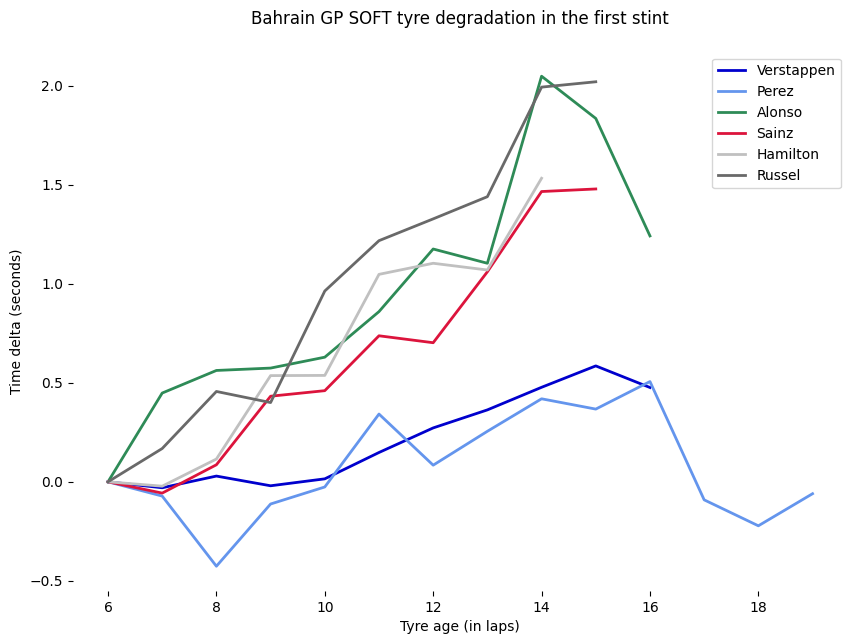

In [144]:
_, ax = plt.subplots(figsize=(10, 7))

plot_data = {
    'Verstappen': {
        'number': '1',
        'color': 'mediumblue'
        },
    'Perez': {
        'number': '11',
        'color': 'cornflowerblue'
    },
    'Alonso': {
        'number': '14',
        'color': 'seagreen'
    },
    'Sainz': {
        'number': '55',
        'color': 'crimson'
    },
    'Hamilton': {
        'number': '44',
        'color': 'silver'
    },
    'Russel': {
        'number': '63',
        'color': 'dimgrey'
    }
}

for k, v in plot_data.items():
    plot_tyre_wear_delta_for_driver_and_stint(data=r23, 
                                              driver_number=v['number'], 
                                              stint=1, 
                                              ax=ax, 
                                              color=v['color'],
                                              driver_name=k)
    ax.set_title('Bahrain GP SOFT tyre degradation in the first stint', pad=20)
    ax.set_ylabel('Time delta (seconds)')
    ax.set_xlabel('Tyre age (in laps)')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)        
    ax.spines['bottom'].set_visible(False) 
    plt.legend()


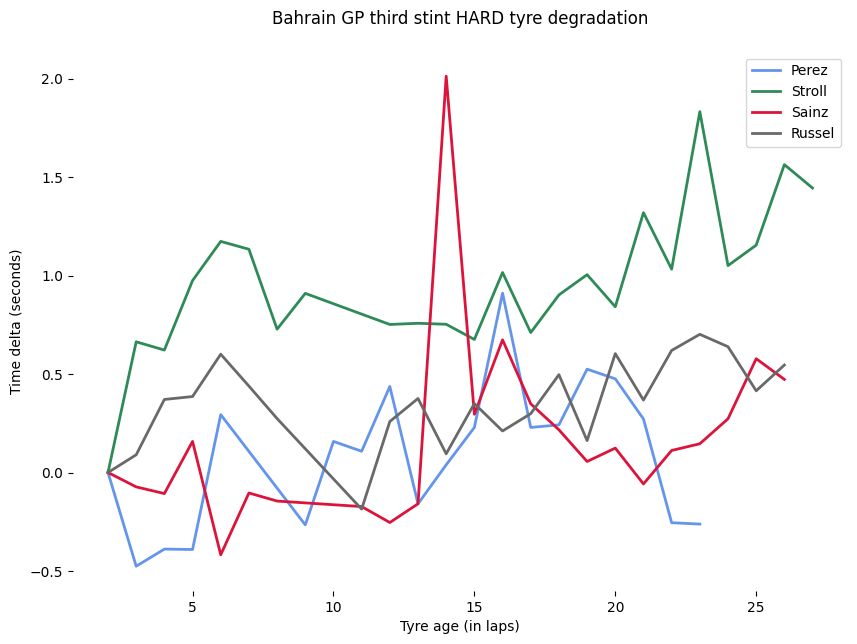

In [151]:
# Now do the same for a hard tyre run (3)
plot_data = {
    'Perez': {
        'number': '11',
        'color': 'cornflowerblue'
    },
    'Stroll': {
        'number': '18',
        'color': 'seagreen'
    },
    'Sainz': {
        'number': '55',
        'color': 'crimson'
    },
    'Russel': {
        'number': '63',
        'color': 'dimgrey'
    },
}


_, ax = plt.subplots(figsize=(10, 7))

for k, v in plot_data.items():
    plot_tyre_wear_delta_for_driver_and_stint(data=r23, 
                                              driver_number=v['number'], 
                                              stint=3, 
                                              ax=ax, 
                                              color=v['color'],
                                              driver_name=k)
    ax.set_title('Bahrain GP third stint HARD tyre degradation', pad=20)
    ax.set_ylabel('Time delta (seconds)')
    ax.set_xlabel('Tyre age (in laps)')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)        
    ax.spines['bottom'].set_visible(False) 
    plt.legend()